# A video strata

First we will open the video `Boards16.mp4` and create a tensor by looking at it as a 16 x 16 x f x 3 tensor where f is the number of frames and 3 are the RGB color channels.

First load Dleto.

In [15]:
include("../../Dleto.jl") 


Dleto.jl loaded successfully.


In [16]:
## Uncomment if not already installed.
using Pkg
Pkg.add("VideoIO")
Pkg.add("ColorTypes")
using VideoIO
using ColorTypes  # Import RGB type

# Load the video file
video = VideoIO.openvideo("Boards16.mp4")

frames = []
while !eof(video)
    frame = read(video)
    push!(frames, frame)
end

close(video)

# Get dimensions
height, width = size(frames[1])
num_frames = length(frames)

# Create 3D tensor: (height, width, frames)
# frames already contain RGB data
video_array = cat(frames..., dims=3)

println("Video tensor shape: ", size(video_array))
println("Number of frames: ", num_frames)

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


Video tensor shape: (16, 16, 65)
Number of frames: 65


## Load Dleto and take a look!


Red channel tensor shape: (16, 16, 65)
Value range: 0.06274509803921569 to 0.9450980392156862
Plotting 16384 points with value-proportional sizes...


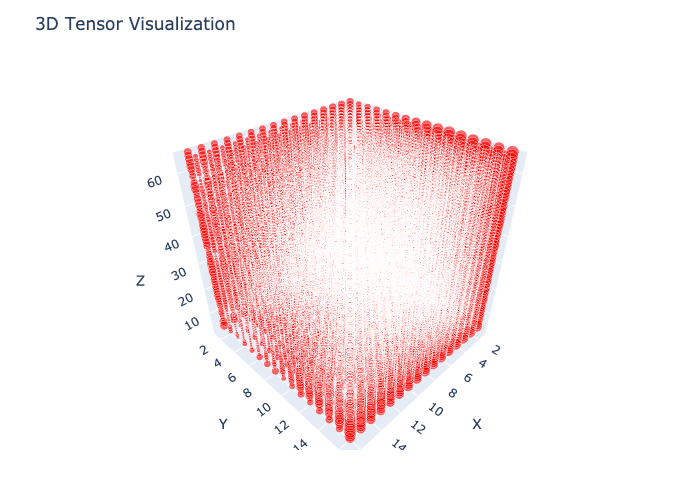

In [17]:

# Convert RGB values to Float64 by extracting the red channel
# video_array is now (height, width, frames) with RGB pixels
# Extract red component from each RGB pixel
red_channel = map(x -> Float64(x.r), video_array)


println("Red channel tensor shape: ", size(red_channel))
println("Value range: ", minimum(red_channel), " to ", maximum(red_channel))
plotTensor(red_channel, 0.1, color="red")

In [18]:
red_channel[:,:,32]  # Accessing the first frame's red channel as an example


16×16 Matrix{Float64}:
 0.462745  0.333333  0.341176  0.380392  …  0.607843  0.588235  0.65098
 0.447059  0.341176  0.352941  0.396078     0.607843  0.588235  0.65098
 0.431373  0.341176  0.372549  0.423529     0.603922  0.584314  0.65098
 0.419608  0.341176  0.368627  0.423529     0.6       0.584314  0.65098
 0.423529  0.32549   0.509804  0.576471     0.592157  0.584314  0.65098
 0.439216  0.301961  0.447059  0.501961  …  0.572549  0.572549  0.643137
 0.419608  0.25098   0.32549   0.321569     0.560784  0.560784  0.631373
 0.415686  0.247059  0.278431  0.254902     0.556863  0.556863  0.623529
 0.403922  0.254902  0.25098   0.286275     0.564706  0.537255  0.607843
 0.4       0.258824  0.243137  0.270588     0.552941  0.52549   0.6
 0.368627  0.211765  0.203922  0.231373  …  0.54902   0.52549   0.596078
 0.360784  0.203922  0.192157  0.211765     0.552941  0.521569  0.592157
 0.372549  0.207843  0.180392  0.2          0.52549   0.501961  0.580392
 0.407843  0.227451  0.180392  0.19215

In [19]:
red_strata = stratify(red_channel)


	Building linear system...
	Sizes: (4737, 16640)
  0.250063 seconds (156.66 k allocations: 624.222 MiB, 5.46% gc time, 39.46% compilation time)

	Computing singular vectors for (4737, 16640)...
	
 31.122980 seconds (5.84 M allocations: 1.224 GiB, 0.60% gc time, 3.47% compilation time)

	Extracting matrices...
  0.017664 seconds (6.64 k allocations: 479.328 KiB, 99.64% compilation time)
  0.000003 seconds (2 allocations: 4.500 KiB)
  0.000024 seconds (4 allocations: 66.344 KiB)


(tensor = [0.01803328277025682 0.012580575572448665 … 0.007392680158112114 0.01283335284308467; 0.021132901353835404 0.015491501483102304 … 0.010039121599924199 0.014931673640940992; … ; 0.08028175321173192 0.12438058475326075 … 0.09783200021015061 0.06951807340784842; -0.007343302182480005 0.01521580441891703 … 0.01470392835292593 0.006095224028180859;;; 0.015969725993930362 0.01683009529406623 … 0.018395041201622334 0.01094372813685224; 0.018714231758511238 0.020809317730511173 … 0.02313096674537064 0.013458299002913177; … ; 0.12460391585160144 0.1949576414922739 … 0.21291670464809148 0.07452670754081661; -0.012587947987258213 0.04385158151231044 … 0.042959143740526055 -0.00651511534266244;;; 0.016106100108327873 0.016803099508870257 … 0.0186526835487239 0.010727165595752807; 0.018896974521617003 0.020808474665030417 … 0.02345397154637452 0.01322107386548437; … ; 0.12551773577468542 0.19628908248474258 … 0.21454418854931012 0.07501228273352956; -0.012403972927159411 0.044034217888403

In [ ]:
plotTensor(red_strata.tensor, 0.1, color="red")

Plotting 7222 points...


data: [
  "scatter3d with fields marker, mode, type, x, y, and z"
]

layout: "layout with fields margin, scene, template, and title"

In [ ]:
# Extract green channel
green_channel = map(x -> Float64(x.g), video_array)
println("Green channel tensor shape: ", size(green_channel))
green_strata = stratify(green_channel)

println("---------------------------")
# Extract blue channel
blue_channel = map(x -> Float64(x.b), video_array)
println("Blue channel tensor shape: ", size(blue_channel))

# Stratify green and blue channels
blue_strata = stratify(blue_channel)

Green channel tensor shape: (16, 16, 65)
Blue channel tensor shape: (16, 16, 65)

	Building linear system...
	Sizes: (4737, 16640)
  0.048816 seconds (99.94 k allocations: 616.627 MiB, 7.42% gc time)

	Computing singular vectors for (4737, 16640)...
	
  7.436338 seconds (36.33 k allocations: 861.182 MiB, 1.19% gc time)

	Extracting matrices...(16, 16, 65)

	Building linear system...
	Sizes: (4737, 16640)
  0.048816 seconds (99.94 k allocations: 616.627 MiB, 7.42% gc time)

	Computing singular vectors for (4737, 16640)...
	
  7.436338 seconds (36.33 k allocations: 861.182 MiB, 1.19% gc time)

	Extracting matrices...
  0.000005 seconds (6 allocations: 4.156 KiB)
  0.000107 seconds (6 allocations: 4.156 KiB)
  0.000011 seconds (6 allocations: 96.156 KiB)

	Building linear system...
	Sizes: (4737, 16640)
  0.013227 seconds (99.94 k allocations: 616.628 MiB, 2.79% gc time)

	Computing singular vectors for (4737, 16640)...
	
  7.364855 seconds (36.33 k allocations: 861.182 MiB, 1.27% gc time

(tensor = [0.013995463146950363 -0.013231858706397199 … -0.00707104211710878 -0.03715616714304543; -0.016371720099396605 0.015709962991049195 … 0.008769097400308607 0.043082626788445884; … ; -0.17813709031120917 0.24428473892254507 … 0.33466072567444205 0.18711552284699587; 0.11746842952630929 -0.16390382257665242 … -0.2354750853830848 -0.11978941598539468;;; 0.014228654821224039 -0.013382438501084488 … -0.006796882214023644 -0.036957575245307656; -0.016611548622532186 0.01585123383712238 … 0.008438467127592277 0.04285426982471202; … ; -0.17647638945687963 0.24307108448276904 … 0.33631857752741146 0.18819202657721723; 0.11624551377238382 -0.16305770861491312 … -0.2368986374509633 -0.12054561060710124;;; 0.01452687056843432 -0.01356454887804984 … -0.00639189257375759 -0.0366046260225027; -0.01691434393144257 0.01601518079706207 … 0.007950285668422695 0.04244798085631795; … ; -0.17377523000837822 0.24085366295755659 … 0.3379284986487202 0.18927046844567877; 0.11428353720462134 -0.1615238

In [ ]:
# plotTensor(red_strata.tensor, 0.1)
plotTensor(green_strata.tensor, 0.1, color="green")
# plotTensor(blue_strata.tensor, 0.1)

Plotting 10040 points...


data: [
  "scatter3d with fields marker, mode, type, x, y, and z"
]

layout: "layout with fields margin, scene, template, and title"

In [ ]:
plotTensor(blue_strata.tensor, 0.1, color="blue")

Plotting 4965 points...


data: [
  "scatter3d with fields marker, mode, type, x, y, and z"
]

layout: "layout with fields margin, scene, template, and title"